In [98]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import gridspec
import scipy.ndimage as ndimage
import timeit

In [99]:
from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache
# pandas for nice tables
import pandas as pd

## Load Data

In [3]:
mcc = MouseConnectivityCache(manifest_file='mcc/manifest.json', resolution=25)

In [6]:
av, _ = mcc.get_annotation_volume()
av.shape

(528L, 320L, 456L)

In [59]:
tv, _ = mcc.get_template_volume()
tv.shape

(528L, 320L, 456L)

## Planes in tv data
tv[0] x tv[1] gives sagittal plane

tv[0] x tv[2] gives horizontal plane

tv[1] x tv[2] gives coronal plane

In [134]:
coordinates = np.array([280, 160, 228]) # we'll use these to check if the rotation was successful or not

## Display of the original sections using the above coordinates

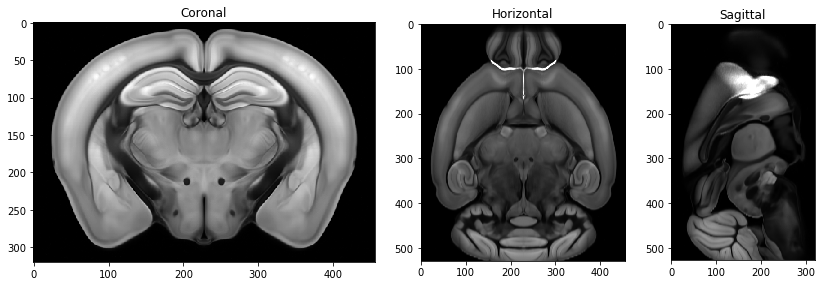

In [101]:
fig = plt.figure(figsize=(14, 12))
gs = gridspec.GridSpec(1, 3, width_ratios=[10, 6, 4.2]) 

ax1 = fig.add_subplot(gs[0])
ax1.title.set_text('Coronal')
plt.imshow(tv[coordinates[0],:,:],cmap=plt.cm.gray)

ax2 = fig.add_subplot(gs[1])
ax2.title.set_text('Horizontal')
plt.imshow(tv[:,coordinates[1],:],cmap=plt.cm.gray)

ax3 = fig.add_subplot(gs[2])
ax3.title.set_text('Sagittal')
plt.imshow(tv[:,:,coordinates[2]],cmap=plt.cm.gray)

## Rotation Along Sagittal Axis

In [229]:
sagittal_rotation_deg = 45

start_time = timeit.default_timer()

rotated_sagittal = ndimage.interpolation.rotate(tv, sagittal_rotation_deg, reshape=True, axes=(0,1))
print rotated_sagittal.shape

elapsed = timeit.default_timer() - start_time
print str(elapsed) + ' seconds'

(600L, 600L, 456L)
12.3937320244 seconds


## Get old coordinates ([280, 160, 228]) into new coordinate space

In [231]:
coordinates_2 = np.array([coordinates[0],coordinates[1],coordinates[2]])
degrees = sagittal_rotation_deg
x = coordinates[0]
y = coordinates[1]
L = tv.shape[0]
H = tv.shape[1]
newL = (L * np.sin(np.radians(degrees)) + H * np.cos(np.radians(degrees)))
newH = (L * np.cos(np.radians(degrees)) + H * np.sin(np.radians(degrees)))

coordinates_2[1] = ((x - 0.5 * L) * np.cos(np.radians(degrees))) - ((y - 0.5 * H) * np.sin(np.radians(degrees))) + 0.5 * newH
coordinates_2[0] = ((x - 0.5 * L) * np.sin(np.radians(degrees))) + ((y - 0.5 * H) * np.cos(np.radians(degrees))) + 0.5 * newL
print coordinates_2

[311 311 228]


## Check to see if it was rotated correctly

graphically:

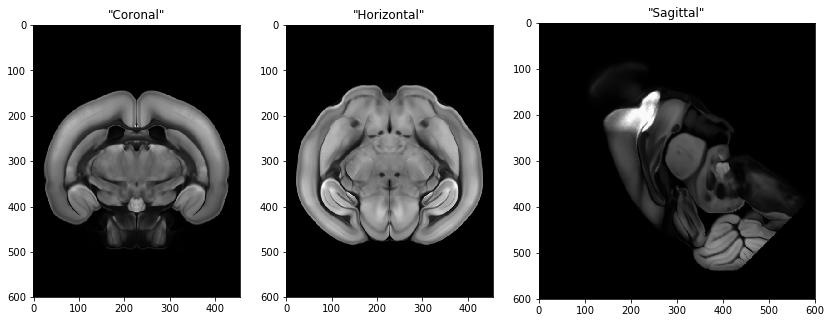

In [142]:
fig = plt.figure(figsize=(14, 12))
gs = gridspec.GridSpec(1, 3, width_ratios=[3,3,4]) 

ax1 = fig.add_subplot(gs[0])
ax1.title.set_text('"Coronal"')
plt.imshow(rotated_sagittal[coordinates_2[0],:,:],cmap=plt.cm.gray)

ax2 = fig.add_subplot(gs[1])
ax2.title.set_text('"Horizontal"')
plt.imshow(rotated_sagittal[:,coordinates_2[1],:],cmap=plt.cm.gray)

ax3 = fig.add_subplot(gs[2])
ax3.title.set_text('"Sagittal"')
plt.imshow(rotated_sagittal[:,:,coordinates_2[2]],cmap=plt.cm.gray)

numerically:

In [143]:
print tv[280,160,228]
print rotated_sagittal[311,311,228]

141
141


## Rotate this image along another axis

In [153]:
horizontal_rotation_deg = 45

start_time = timeit.default_timer()

rotated_horizontal = ndimage.interpolation.rotate(rotated_sagittal, horizontal_rotation_deg, reshape=True, axes=(0,2))
print rotated_horizontal.shape

elapsed = timeit.default_timer() - start_time
print str(elapsed) + ' seconds'

(747L, 600L, 747L)
25.4111604616 seconds


In [162]:
coordinates_3 = np.array([coordinates_2[0],coordinates_2[1],coordinates_2[2]])
degrees = horizontal_rotation_deg
x = coordinates_2[0]
y = coordinates_2[2]
L = rotated_sagittal.shape[0]
H = rotated_sagittal.shape[2]
newL = (L * np.sin(np.radians(degrees)) + H * np.cos(np.radians(degrees)))
newH = (L * np.cos(np.radians(degrees)) + H * np.sin(np.radians(degrees)))

coordinates_3[2] = ((x - 0.5 * L) * np.cos(np.radians(degrees))) - ((y - 0.5 * H) * np.sin(np.radians(degrees))) + 0.5 * newH
coordinates_3[0] = ((x - 0.5 * L) * np.sin(np.radians(degrees))) + ((y - 0.5 * H) * np.cos(np.radians(degrees))) + 0.5 * newL
print coordinates_3

[381 311 381]


## Check to see if it was rotated correctly

graphically:

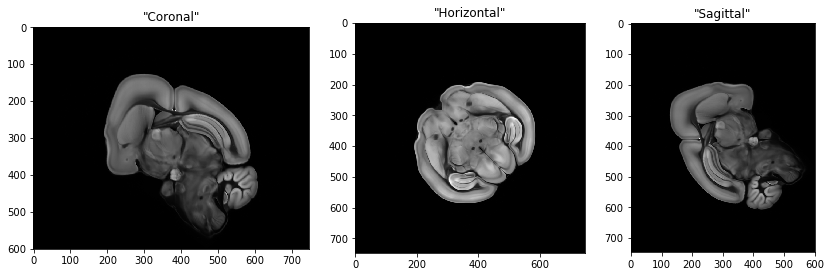

In [163]:
fig = plt.figure(figsize=(14, 12))
gs = gridspec.GridSpec(1, 3, width_ratios=[6,5,4]) 

ax1 = fig.add_subplot(gs[0])
ax1.title.set_text('"Coronal"')
plt.imshow(rotated_horizontal[coordinates_3[0],:,:],cmap=plt.cm.gray)

ax2 = fig.add_subplot(gs[1])
ax2.title.set_text('"Horizontal"')
plt.imshow(rotated_horizontal[:,coordinates_3[1],:],cmap=plt.cm.gray)

ax3 = fig.add_subplot(gs[2])
ax3.title.set_text('"Sagittal"')
plt.imshow(rotated_horizontal[:,:,coordinates_3[2]],cmap=plt.cm.gray)

numerically:

In [235]:
print tv[280,160,228]
print rotated_horizontal[381,311,381]

141
141


## Last axis rotation!

In [249]:
coronal_rotation_deg = 45

start_time = timeit.default_timer()

rotated_coronal = ndimage.interpolation.rotate(rotated_horizontal, coronal_rotation_deg, reshape=True, axes=(2,1))
print rotated_coronal.shape

elapsed = timeit.default_timer() - start_time
print str(elapsed) + ' seconds'

(747L, 952L, 952L)
54.6100779298 seconds


In [250]:
coordinates_4 = np.array([coordinates_3[0],coordinates_3[1],coordinates_3[2]])
degrees = coronal_rotation_deg
x = coordinates_3[2]
y = coordinates_3[1]
L = rotated_horizontal.shape[2]
H = rotated_horizontal.shape[1]
newL = (L * np.sin(np.radians(degrees)) + H * np.cos(np.radians(degrees)))
newH = (L * np.cos(np.radians(degrees)) + H * np.sin(np.radians(degrees)))

coordinates_4[1] = ((x - 0.5 * L) * np.cos(np.radians(degrees))) - ((y - 0.5 * H) * np.sin(np.radians(degrees))) + 0.5 * newH
coordinates_4[2] = ((x - 0.5 * L) * np.sin(np.radians(degrees))) + ((y - 0.5 * H) * np.cos(np.radians(degrees))) + 0.5 * newL
print coordinates_4

[381 473 489]


## Check to see if it was rotated correctly

graphically:

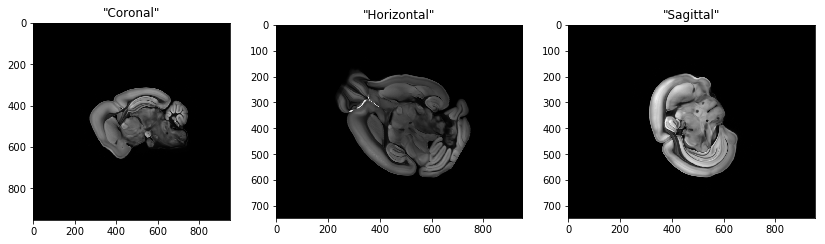

In [251]:
fig = plt.figure(figsize=(14, 12))
gs = gridspec.GridSpec(1, 3, width_ratios=[4,5,5]) 

ax1 = fig.add_subplot(gs[0])
ax1.title.set_text('"Coronal"')
plt.imshow(rotated_coronal[coordinates_4[0],:,:],cmap=plt.cm.gray)

ax2 = fig.add_subplot(gs[1])
ax2.title.set_text('"Horizontal"')
plt.imshow(rotated_coronal[:,coordinates_4[1],:],cmap=plt.cm.gray)

ax3 = fig.add_subplot(gs[2])
ax3.title.set_text('"Sagittal"')
plt.imshow(rotated_coronal[:,:,coordinates_4[2]],cmap=plt.cm.gray)

numerically:

In [252]:
print tv[280,160,228]
print rotated_coronal[381,473,489]

141
141
